#### Урок 9. Линейная регрессия Логистическая регрессия

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

  Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

<function matplotlib.pyplot.show(close=None, block=None)>

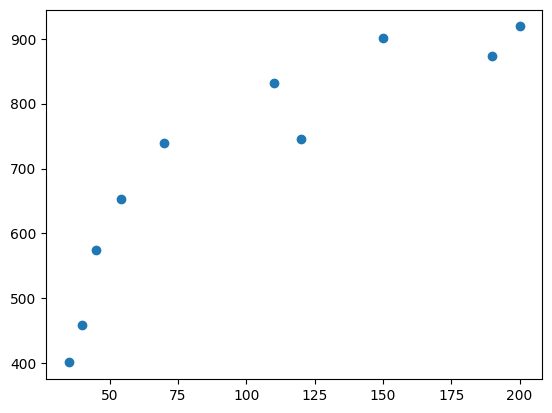

In [4]:
plt.scatter(zp,ks)
plt.show

In [6]:
R=np.corrcoef(zp,ks)[0,1]**2 
R

0.7876386635293682

С использованием intercept

In [7]:
b1=(np.mean(zp*ks)-np.mean(zp)*np.mean(ks))/(np.mean(zp**2)-np.mean(zp)**2)
b1

2.620538882402765

In [8]:
b0 = np.mean(ks) - b1*np.mean(zp)
b0

444.1773573243596

Т.о. формула ks = 444.177 + 2.6205*zp

<function matplotlib.pyplot.show(close=None, block=None)>

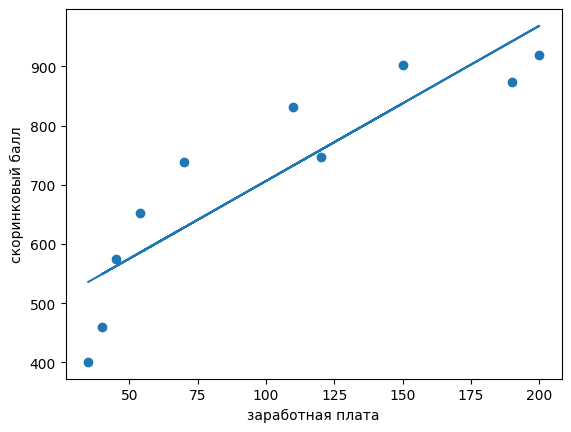

In [11]:
plt.scatter(zp,ks)
plt.plot(zp, zp*b1 + b0)
plt.xlabel("заработная плата")
plt.ylabel("скоринковый балл")
plt.show

Без использования intercept

In [12]:
X=zp.reshape((len(zp),1))
Y=ks.reshape((len(ks),1))

In [14]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)), X.T @ Y)
B

array([[5.88982042]])

Т.о. формула ks = 5.8898*zp

<function matplotlib.pyplot.show(close=None, block=None)>

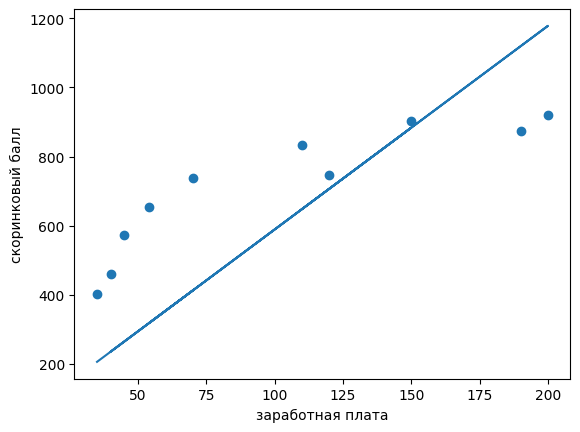

In [18]:
plt.scatter(zp,ks)
plt.plot(zp, zp*B[0])
plt.xlabel("заработная плата")
plt.ylabel("скоринковый балл")
plt.show

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [19]:
def mse_(B1, y=zp, x=ks, n=8):
  return np.sum((B1*x-y)**2)/n

In [20]:
alpha = 1e-6 # скорость обучения, в данном случае одна миллионная
B1=0.1 # минимальное стартовое значение
n=len(zp)

In [24]:
for i in range (3000):
  B1 -=alpha*2/n *np.sum((B1 *zp -ks)*zp)
  if i%500 ==0:
    print('Iteration = {i}, B1={B1}, mse={mse}'.format(i=i, B1=B1, mse=mse_(B1)))

Iteration = 0, B1=2.2938403441210307, mse=3066900.36639854
Iteration = 500, B1=5.889817338768381, mse=21996498.17436804
Iteration = 1000, B1=5.889820420130048, mse=21996521.797133826
Iteration = 1500, B1=5.889820420132673, mse=21996521.797153946
Iteration = 2000, B1=5.889820420132673, mse=21996521.797153946
Iteration = 2500, B1=5.889820420132673, mse=21996521.797153946


Т.о. формула ks = 5.8898*zp

Как и при расчете матричным методом

3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [29]:
def mse_(B0, B1, X3, Y3, n):
  return np.sum((B0+B1*X3-Y3)**2)/n

In [46]:
B1=0.1
B0=100
alpha = 1e-5
n=len(zp)
for i in range ((10**7//2+1)):
  B1 -=alpha*2/n *np.sum((B0+B1 *zp -ks)*zp)
  B0 -=alpha*2/n *np.sum((B0+B1 *zp -ks))
  if i%500000 ==0:
    print(B1, B0)

1.4924808000000003 100.0091712489376
2.821003497459096 416.9419533111227
2.6364033484388343 442.02198869820484
2.62179437221846 444.0067847155461
2.6206382399653614 444.1638584664274
2.620546745409864 444.1762890451771
2.620539504669231 444.177272782364
2.6205389316479986 444.17735063383304
2.6205388863000483 444.17735679486924
2.620538882712162 444.1773572823246
2.6205388824440017 444.1773573187572


Т.о. формула ks = 444.177 + 2.6205*zp

как и в первом способе расчета